## IMPORTING LIBRARIES

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## VISUALISING THE DATA

In [161]:
data=pd.read_csv('D:/netflix_titles.csv')

In [162]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [163]:
data.shape

(7787, 12)

In [164]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genre         7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [166]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
genre           object
description     object
dtype: object

## CLEANING AND PREPARING THE DATA

### Removing columns which are not useful

In [167]:
data.drop(['director','cast','description','title','duration'],axis='columns',inplace=True)
data.head()

,show_id,type,country,date_added,release_year,rating,genre
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,United States,"January 1, 2020",2008,PG-13,Dramas


### Checking for duplicated data 

In [168]:
data[data.duplicated()]

,show_id,type,country,date_added,release_year,rating,genre


### Checking and removing null values

In [169]:
data.isnull()

,show_id,type,country,date_added,release_year,rating,genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False
7784,False,False,True,False,False,False,False
7785,False,False,False,False,False,False,False


In [170]:
data.isnull().sum()

show_id           0
type              0
country         507
date_added       10
release_year      0
rating            7
genre             0
dtype: int64

<AxesSubplot:>

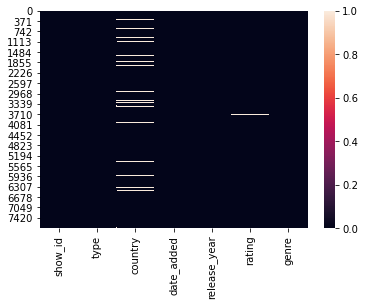

In [171]:
sns.heatmap(data.isnull())

In [172]:
data.dropna(axis=0,how='any', inplace=True)
data.shape

(7265, 7)

<AxesSubplot:>

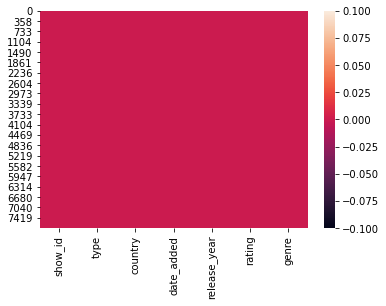

In [173]:
sns.heatmap(data.isnull())

In [174]:
data.isnull().sum()

show_id         0
type            0
country         0
date_added      0
release_year    0
rating          0
genre           0
dtype: int64

### Correcting the data type of column

In [175]:
data['date_new']=pd.to_datetime(data['date_added'])
data.dtypes

show_id                 object
type                    object
country                 object
date_added              object
release_year             int64
rating                  object
genre                   object
date_new        datetime64[ns]
dtype: object

In [176]:
data.head(5)

,show_id,type,country,date_added,release_year,rating,genre,date_new
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020-08-14
1,s2,Movie,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies",2016-12-23
2,s3,Movie,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies",2018-12-20
3,s4,Movie,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",2017-11-16
4,s5,Movie,United States,"January 1, 2020",2008,PG-13,Dramas,2020-01-01


# PERFORMING THE ANALYSIS

C:\Users\sange\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

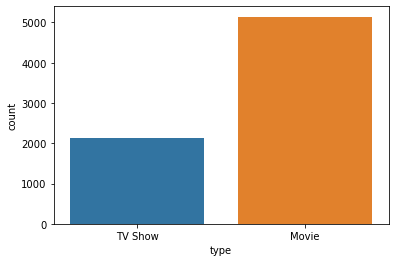

In [183]:
data['type'].value_counts()
sns.countplot(data['type'])

In [132]:
most_productions = data['date_new'].dt.year.value_counts()
most_productions

2019    1993
2020    1890
2018    1562
2017    1157
2016     421
2021     102
2015      83
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_new, dtype: int64

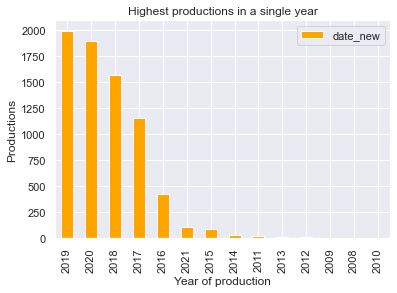

In [185]:
most_productions.plot(kind='bar',color='orange')
plt.title('Highest productions in a single year')
plt.xlabel('Year of production')
plt.ylabel('Productions')
plt.legend()
plt.show()